1. What is Boosting in Machine Learning? Explain how it improves weak
- Boosting is an ensemble learning method where multiple weak learners (models performing slightly better than random guessing, e.g., shallow trees) are trained sequentially. Each new model focuses on correcting the mistakes of the previous ones. Finally, the learners are combined through weighted voting (classification) or averaging (regression) to form a strong learner.

  It improves weak learning by:

  - Giving more weight to misclassified samples so later models focus on harder cases.

  - Sequentially reducing bias and variance.

  - Producing high accuracy models even with simple base learners.

2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- AdaBoost trains models sequentially by giving higher weights to the samples that were misclassified by the previous learner. Each new weak learner focuses more on the “hard-to-classify” instances, and the final prediction is made through a weighted combination of all learners.

- Gradient Boosting, on the other hand, also trains models sequentially but instead of reweighting samples, it builds new learners to predict the residual errors (the difference between the true values and the current predictions). This process uses gradient descent to minimize a chosen loss function, making Gradient Boosting more flexible and powerful compared to AdaBoost.

3. How does regularization help in XGBoost?
- XGBoost includes regularization terms (L1 & L2 penalties) in its objective function.

  - L1 (Lasso): Encourages sparsity (removes unnecessary features).

  - L2 (Ridge): Prevents overfitting by shrinking large weights.

   - Helps in controlling model complexity, reducing overfitting, and improving generalization.

Question 4: Why is CatBoost considered efficient for handling categorical data?
- CatBoost is efficient because:

  1. Uses ordered target statistics (avoids target leakage).

  2. Performs automatic categorical feature encoding, removing the need for manual one-hot encoding.

  3. Handles high-cardinality categorical variables well.

  4. Provides fast training with GPU support.

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
- Boosting is preferred when accuracy and handling complex patterns are more important than interpretability.
 - Some real world application are -
   - Credit risk prediction (loan defaults, fraud detection).

   - Medical diagnosis (detecting cancer, heart disease).

   - E-commerce (recommendation engines, customer churn prediction).

   - Finance (stock market prediction, credit scoring).

   - Natural Language Processing (NLP) (spam filtering, sentiment analysis).

In [10]:
#6. Write a Python program to: ● Train an AdaBoost Classifier on the Breast Cancer dataset ● Print the model accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Accuracy: 0.9707602339181286


In [3]:
#7. Write a Python program to: ● Train a Gradient Boosting Regressor on the California Housing dataset ● Evaluate performance using R-squared score
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.804992915650479


In [9]:
#8. Write a Python program to: ● Train an XGBoost Classifier on the Breast Cancer dataset ● Tune the learning rate using GridSearchCV ● Print the best parameters and accuracy
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearch for learning_rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:51] WARNING: /w

Best Parameters: {'learning_rate': 0.05}
Best Accuracy: 0.9649122807017544


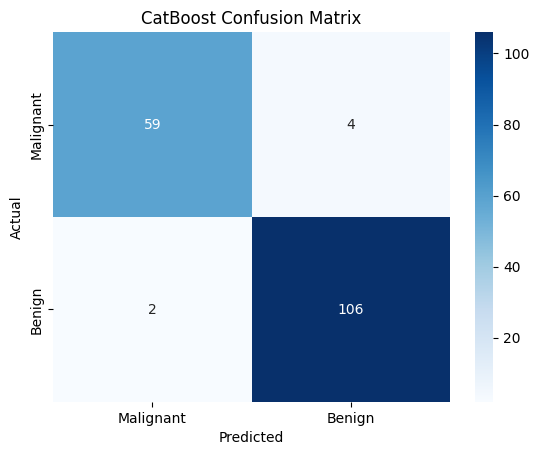

In [7]:
#9. Write a Python program to: ● Train a CatBoost Classifier ● Plot the confusion matrix using seaborn
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


 10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

     Describe your step-by-step data science pipeline using boosting techniques:
     ● Data preprocessing & handling missing/categorical values
     ● Choice between AdaBoost, XGBoost, or CatBoost
     ● Hyperparameter tuning strategy
     ● Evaluation metrics you'd choose and why
     ● How the business would benefit from your model
- Step 1: Data Preprocessing

 - Handle missing values (impute with mean/median for numeric, mode/“unknown” for categorical).

 - Normalize numeric features (scaling).

 - Encode categorical variables:

   - If using CatBoost → no manual encoding needed.

   - Otherwise → use one-hot or target encoding.

   Step 2: Choice of Algorithm

 - AdaBoost → not ideal (less powerful).

 - XGBoost → good for structured data with numeric features.

 - CatBoost → best choice due to mixed categorical + numeric data.

   Step 3: Hyperparameter Tuning

 - Use GridSearchCV / RandomizedSearchCV for parameters:

   - learning_rate, max_depth, n_estimators, subsample, colsample_bytree.

   Step 4: Evaluation Metrics

 - Dataset is imbalanced → accuracy is misleading.

 - Use Precision, Recall, F1-score, ROC-AUC.

 - Business context → Recall (identify defaulters) is more important.

   Step 5: Business Benefits

 - Better risk management → fewer loan defaults.

 - Improved customer profiling → personalized loan offers.

 - Cost savings → avoiding losses from high-risk borrowers.

